In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


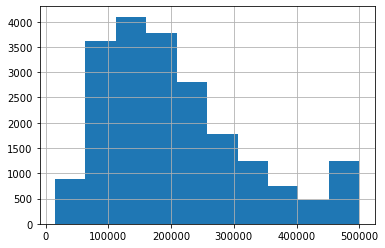

In [8]:
# Median house values

df.median_house_value.hist()
plt.show() 

In [9]:
# Selecting only required columns for our model
features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income']
target = ['median_house_value_log']

In [10]:
df['median_house_value_log'] = np.log1p(df.median_house_value)

In [12]:
# Q1 Find a feature with missing values. How many missing values does it have?

missing_values = df.isna().sum()
print(missing_values[missing_values > 0])

total_bedrooms    207
dtype: int64


In [13]:
# Q2 What's the median (50% percentile) for variable 'population'?

median_population = np.median(df.population)
print(median_population)

1166.0


### Split the data
* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [14]:
def shuffle(data):

    n = len(data)
    np.random.seed(42)
    
    index = np.arange(n)
    np.random.shuffle(index)
    
    shuffled_data = data.iloc[index].reset_index(drop=True)
    return shuffled_data

In [17]:
shuffle(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_house_value_log
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND,10.772708
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND,10.732061
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY,13.122367
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN,12.295003
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,12.535380
...,...,...,...,...,...,...,...,...,...,...,...
20635,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN,12.342355
20636,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND,11.490690
20637,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN,12.310888
20638,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN,12.554971


In [19]:
# Splitting Data
validation_percent=0.2
test_percent=0.2
    
n = len(df)
n_val = int(n * validation_percent)
n_test = int(n * test_percent)
n_train = n - n_val - n_test

df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [23]:
df_train.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_house_value_log
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,13.022766


In [24]:
df_val.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_house_value_log
12384,-116.39,33.72,19.0,7646.0,1618.0,2496.0,1075.0,3.5569,128000.0,INLAND,11.759793


In [25]:
df_test.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_house_value_log
16512,-121.22,37.72,34.0,2123.0,387.0,1310.0,368.0,2.6368,165600.0,INLAND,12.017337
